## Date: 01/02/2023

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import itertools

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_moons

import mlxtend
from mlxtend.plotting import plot_decision_regions

In [2]:
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
print("sklearn version: ", sklearn.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("seaborn version: ", sns.__version__)
print("mlxtend version: ", mlxtend.__version__)

# numpy version:  1.24.1
# pandas version:  1.5.2
# sklearn version:  1.2.0
# matplotlib version:  3.6.3
# seaborn version:  0.12.2
# mlxtend version:  0.21.0

numpy version:  1.24.1
pandas version:  1.5.2
sklearn version:  1.2.0
matplotlib version:  3.6.3
seaborn version:  0.12.2
mlxtend version:  0.21.0


Doc: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons

In [3]:
X, y = make_moons(n_samples=200, random_state=123, noise=0.2)

In [4]:
X.shape

(200, 2)

In [5]:
X[:10]

array([[-0.07796241,  1.06293368],
       [ 0.20230378, -0.06772446],
       [ 0.59980849,  0.67237698],
       [ 1.04841146, -0.65137736],
       [ 0.89124889,  0.70056406],
       [-0.37381846,  0.00460626],
       [ 1.88003707,  0.20903883],
       [-0.07894338,  0.8336929 ],
       [ 1.27853618, -0.21403038],
       [ 1.28536099, -0.43163168]])

In [6]:
y

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1], dtype=int64)

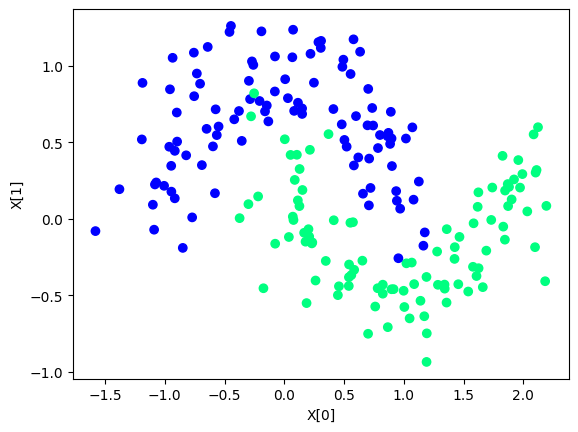

In [7]:
# Let's plot

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="winter")
plt.xlabel(xlabel="X[0]")
plt.ylabel(ylabel="X[1]")
plt.show()

In [8]:
# Now apply only Logistic Regression

lr_model = LogisticRegression()

In [9]:
lr_model.fit(X=X, y=y)

LogisticRegression()

In [10]:
lr_model.classes_

array([0, 1], dtype=int64)

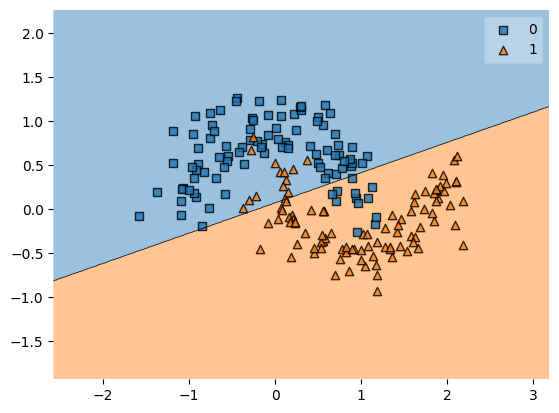

In [11]:
# Let's plot the decission boundary

ax = plot_decision_regions(X=X, y=y, clf=lr_model)
plt.show()


# As you can see logistic regression try to divide two class using just using a straight line

In [12]:
print(cross_val_score(estimator=lr_model, X=X, y=y, scoring="accuracy", cv=10))

[0.85 1.   0.85 0.75 0.95 0.8  0.85 0.95 0.75 0.9 ]


In [13]:
print(np.mean(cross_val_score(estimator=lr_model, X=X, y=y, scoring="accuracy", cv=10)))

0.865


### Now let's apply Polynomial Regression

In [14]:
poly_model = PolynomialFeatures(degree=3, include_bias=False)

In [15]:
X_poly = poly_model.fit_transform(X=X)

In [16]:
X_poly[:10]

array([[-7.79624103e-02,  1.06293368e+00,  6.07813742e-03,
        -8.28688714e-02,  1.12982800e+00, -4.73866243e-04,
         6.46065696e-03, -8.80841142e-02,  1.20093223e+00],
       [ 2.02303783e-01, -6.77244639e-02,  4.09268206e-02,
        -1.37009153e-02,  4.58660301e-03,  8.27965064e-03,
        -2.77174699e-03,  9.27887140e-04, -3.10625230e-04],
       [ 5.99808489e-01,  6.72376979e-01,  3.59770224e-01,
         4.03297420e-01,  4.52090802e-01,  2.15793235e-01,
         2.41901216e-01,  2.71167901e-01,  3.03975447e-01],
       [ 1.04841146e+00, -6.51377357e-01,  1.09916658e+00,
        -6.82911483e-01,  4.24292461e-01,  1.15237883e+00,
        -7.15972222e-01,  4.44833077e-01, -2.76374502e-01],
       [ 8.91248886e-01,  7.00564057e-01,  7.94324577e-01,
         6.24376935e-01,  4.90789998e-01,  7.07940895e-01,
         5.56475248e-01,  4.37416039e-01,  3.43829832e-01],
       [-3.73818456e-01,  4.60626138e-03,  1.39740238e-01,
        -1.72190552e-03,  2.12176439e-05, -5.223748

In [17]:
# Let's create another lr model

lr_model2 = LogisticRegression()

In [18]:
lr_model2.fit(X=X_poly, y=y)

LogisticRegression()

In [19]:
print(np.mean(cross_val_score(estimator=lr_model2, X=X_poly, y=y, scoring="accuracy", cv=10)))

0.9299999999999999


In [20]:
# let's create function that will plot decision boundary

def plot_decision_boundary(X, y, degree=1):
    
    poly_model = PolynomialFeatures(degree=degree)
    X_poly = poly_model.fit_transform(X=X)
    
    logistic_model = LogisticRegression()
    logistic_model.fit(X=X_poly, y=y)
    
    accuracy = np.mean(cross_val_score(estimator=logistic_model, X=X_poly, y=y, cv=10, scoring="accuracy"))
    
    a = np.arange(start=X[:, 0].min()-1, stop=X[:, 0].max()+1, step=0.01)
    b = np.arange(start=X[:, 1].min()-1, stop=X[:, 1].max()+1, step=0.01)
    
    XX, YY = np.meshgrid(a, b)
    
    input_array = np.array([XX.ravel(), YY.ravel()]).T
    
    labels = logistic_model.predict(X=poly_model.transform(X=input_array))
    
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
    
    plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="winter")
    
    plt.title(label=f"Degree = {degree}, Accuracy is: {np.round(accuracy, 4)}")
    
    plt.show()

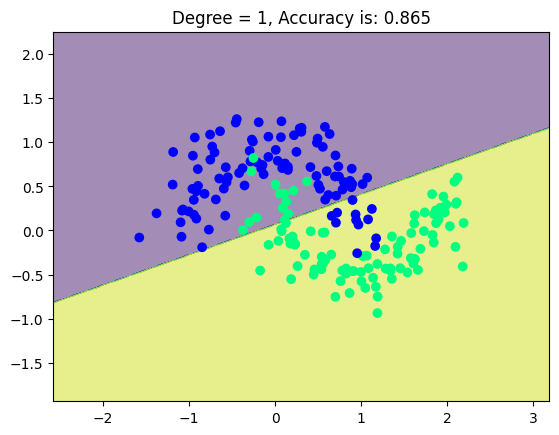

In [21]:
plot_decision_boundary(X, y, degree=1)

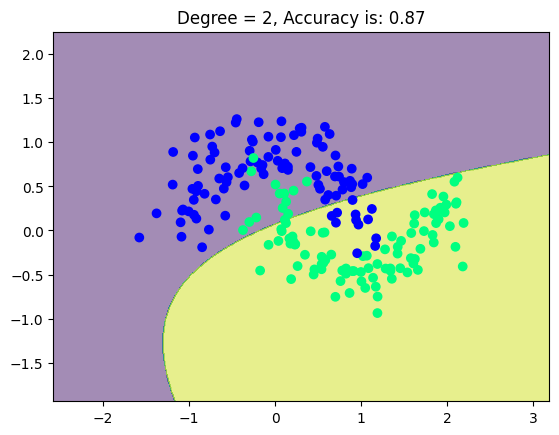

In [22]:
plot_decision_boundary(X, y, degree=2)

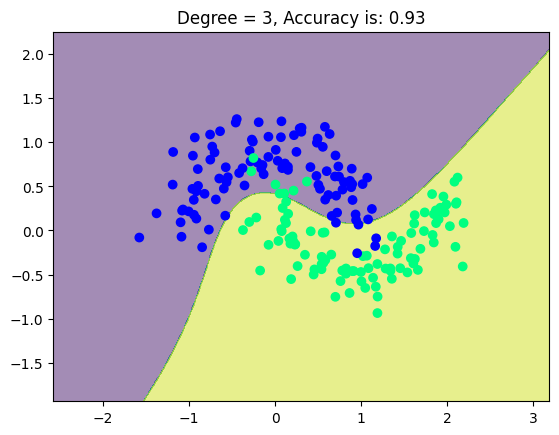

In [23]:
plot_decision_boundary(X, y, degree=3)

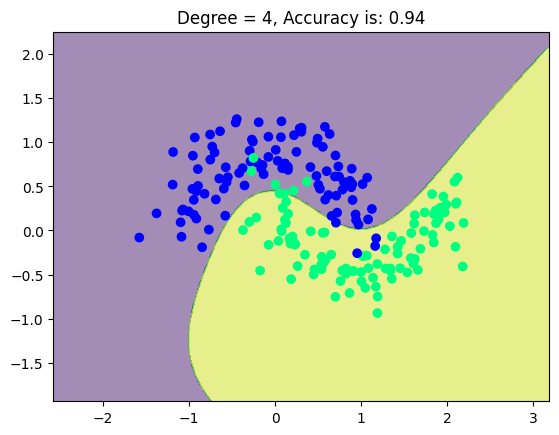

In [24]:
plot_decision_boundary(X, y, degree=4)

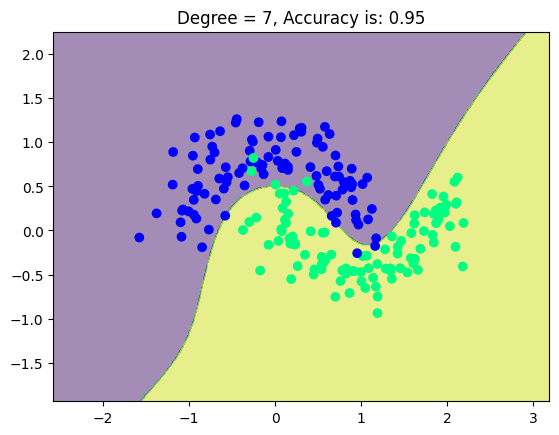

In [25]:
plot_decision_boundary(X, y, degree=7)

In [26]:
# gridspec.GridSpec(
#     nrows,
#     ncols,
#     figure=None,
#     left=None,
#     bottom=None,
#     right=None,
#     top=None,
#     wspace=None,
#     hspace=None,
#     width_ratios=None,
#     height_ratios=None,
# )

This thing:  [(LogisticRegression(random_state=1), 'Logistic Regression', (0, 0)), (RandomForestClassifier(random_state=1), 'Random Forest', (0, 1)), (GaussianNB(), 'Naive Bayes', (1, 0)), (SVC(gamma='auto'), 'SVM', (1, 1))]


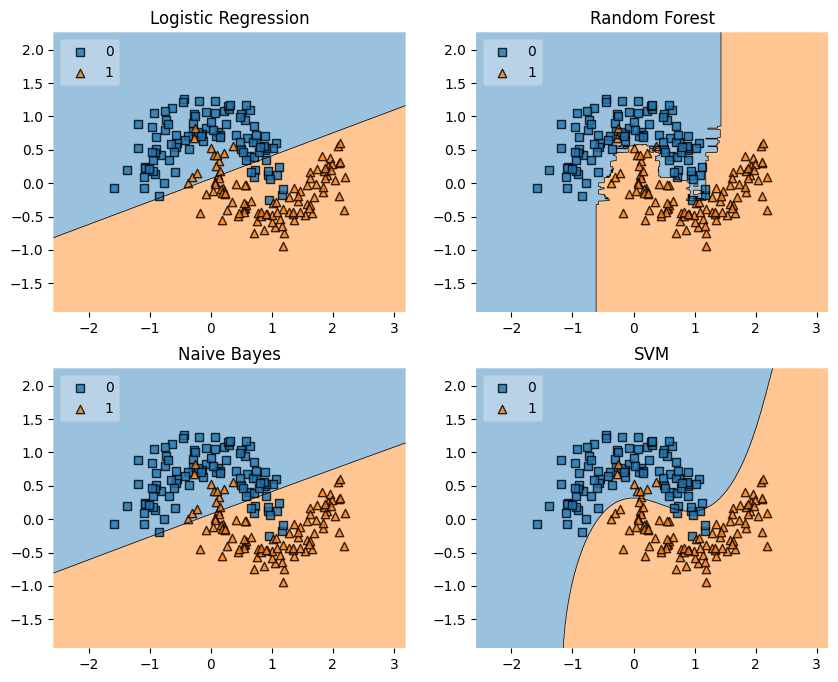

In [27]:
# Initializing Classifiers

clf1 = LogisticRegression(random_state=1, solver='lbfgs')

clf2 = RandomForestClassifier(n_estimators=100, random_state=1)

clf3 = GaussianNB()

clf4 = SVC(gamma='auto')



gs = gridspec.GridSpec(nrows=2, ncols=2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']

print("This thing: ", list(zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2))))

for clf, lab, grd in zip([clf1, clf2, clf3, clf4], labels, itertools.product([0, 1], repeat=2)):

    clf.fit(X=X, y=y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    ax2 = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [28]:
list(itertools.product([0, 1], repeat=2))

[(0, 0), (0, 1), (1, 0), (1, 1)]